In [1]:
import torch
import torch.nn as nn        # Pytorch neural network package
import torch.optim as optim  # Pytorch optimization package
import torch.nn.functional as F
import numpy
import numpy as np
import matplotlib.pyplot as plt

device = torch.device("cuda")

In [2]:
features = 16
# define a simple linear VAE #until now normal VAE without Beta
class LinearVAE(nn.Module):
    def __init__(self):
        super(LinearVAE, self).__init__()
 
        # encoder 84*84 = 7’056
        self.enc0 = nn.Linear(in_features=84*84, out_features=1024)
        self.enc1 = nn.Linear(in_features=1024, out_features=512)
        self.enc2 = nn.Linear(in_features=512, out_features=features*2)
 
        # decoder 
        self.dec0 = nn.Linear(in_features=features, out_features=512)
        self.dec1 = nn.Linear(in_features=512, out_features=1024)
        self.dec2 = nn.Linear(in_features=1024, out_features=84*84)

    def reparameterize(self, mu, log_var):
        """
        :param mu: mean from the encoder's latent space
        :param log_var: log variance from the encoder's latent space
        """
        std = torch.exp(0.5*log_var) # standard deviation
        eps = torch.randn_like(std) # `randn_like` as we need the same size
        sample = mu + (eps * std) # sampling as if coming from the input space
        return sample
 
    
    def encode(self, x):
        x = F.relu(self.enc0(x))
        x = F.relu(self.enc1(x))
        x = self.enc2(x)
        return x

In [3]:
BVAE1 = LinearVAE()
BVAE10 = LinearVAE()
BVAE50= LinearVAE()
BVAE500 = LinearVAE()


BVAE1.load_state_dict(torch.load('C:/Users/erics/Documents/Programme/Bachelorarbeit/models/BVAE_Pong/B=1VAEMAR9'))
BVAE1.to(device)
BVAE10.load_state_dict(torch.load('C:/Users/erics/Documents/Programme/Bachelorarbeit/models/BVAE_Pong/B=10VAEMAR9'))
BVAE10.to(device)
BVAE50.load_state_dict(torch.load('C:/Users/erics/Documents/Programme/Bachelorarbeit/models/BVAE_Pong/B=50VAEMAR9'))
BVAE50.to(device)
BVAE500.load_state_dict(torch.load('C:/Users/erics/Documents/Programme/Bachelorarbeit/models/BVAE_Pong/B=500VAEMAR9'))
BVAE500.to(device)


LinearVAE(
  (enc0): Linear(in_features=7056, out_features=1024, bias=True)
  (enc1): Linear(in_features=1024, out_features=512, bias=True)
  (enc2): Linear(in_features=512, out_features=32, bias=True)
  (dec0): Linear(in_features=16, out_features=512, bias=True)
  (dec1): Linear(in_features=512, out_features=1024, bias=True)
  (dec2): Linear(in_features=1024, out_features=7056, bias=True)
)

In [4]:
#train_data = numpy.load('train_data100kFEB23.npy')
#val_data = numpy.load('val_data20kFEB23.npy')

In [5]:
print(train_data.shape)

(101848, 84, 84)


In [6]:
randomInput = torch.rand(256, 7056, device=device) #7056 = 84* 84
print(randomInput)


tensor([[0.5916, 0.9249, 0.2319,  ..., 0.4303, 0.2696, 0.8173],
        [0.8082, 0.3633, 0.9700,  ..., 0.2189, 0.9576, 0.6571],
        [0.4349, 0.3128, 0.2789,  ..., 0.3177, 0.7236, 0.4306],
        ...,
        [0.3537, 0.3785, 0.2314,  ..., 0.5588, 0.1766, 0.0963],
        [0.6577, 0.3834, 0.3138,  ..., 0.5305, 0.1469, 0.1662],
        [0.5456, 0.2446, 0.0266,  ..., 0.8613, 0.6114, 0.4789]],
       device='cuda:0')


In [7]:
enco1 = BVAE1.encode(randomInput)
enco10 = BVAE10.encode(randomInput)
enco50 = BVAE50.encode(randomInput)
enco500 = BVAE500.encode(randomInput)


print(enco10)
print(enco50)

tensor([[-0.3718,  2.8371, -0.3602,  ..., -2.7050, -8.3146, -1.5356],
        [ 0.7699,  1.6812,  0.0962,  ..., -2.6794, -8.2015, -1.4802],
        [-0.2170,  0.6260,  0.1304,  ..., -2.6644, -7.4924, -1.4475],
        ...,
        [ 1.3139,  0.5595,  0.6350,  ..., -2.9043, -7.7469, -1.5845],
        [ 1.8209,  0.2612,  0.3667,  ..., -2.8308, -7.8048, -1.6079],
        [ 0.8474, -0.0431,  0.3968,  ..., -2.8238, -7.4119, -1.4881]],
       device='cuda:0', grad_fn=<AddmmBackward0>)
tensor([[ 5.3491e-02,  9.5180e-02,  3.3459e-04,  ..., -8.9461e-02,
         -5.5072e+00, -6.4763e-02],
        [ 1.2739e+00,  5.4909e-02, -3.9099e-02,  ..., -1.1841e-02,
         -5.7170e+00, -2.2034e-02],
        [-2.0750e-02,  3.5470e-02, -4.5064e-02,  ...,  4.5272e-02,
         -5.0505e+00,  3.7817e-03],
        ...,
        [ 1.6080e+00, -4.6575e-02, -9.1805e-04,  ..., -6.8349e-02,
         -5.3701e+00, -6.0914e-02],
        [ 2.7016e+00, -1.1454e-01, -1.4407e-02,  ..., -2.4057e-01,
         -5.3335e+00, -1

In [8]:
print(enco10.shape)

torch.Size([256, 32])


In [9]:
enco1 = enco1.detach().cpu()
enco10 = enco10.detach().cpu()
enco50 = enco50.detach().cpu()
enco500 = enco500.detach().cpu()

In [10]:
def compute_gaussian_kl(z_mean, z_logvar):
    return np.mean(0.5 * (np.square(z_mean) + np.exp(z_logvar) - z_logvar - 1), axis=0)

def computeIt(enco):
    x = enco.view(-1, 2, features)
    # get `mu` and `log_var`
    mu = x[:, 0, :] # the first feature values as mean
    log_var = x[:, 1, :]

    return compute_gaussian_kl(mu.detach().cpu().numpy(), log_var.detach().cpu().numpy())

In [11]:
KLenco1 = computeIt(enco1)
KLenco10 = computeIt(enco10)
KLenco50 = computeIt(enco50)
KLenco500 = computeIt(enco500)

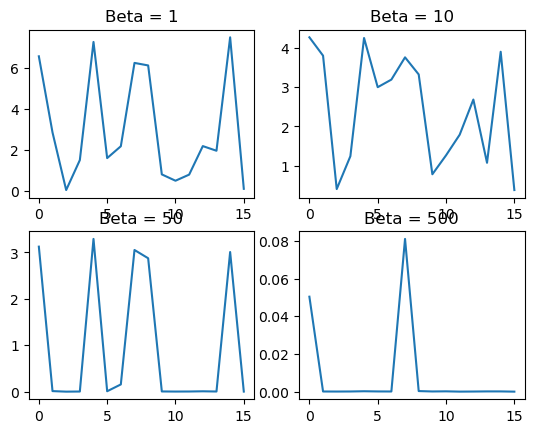

In [12]:
figure, axis = plt.subplots(2,2)

axis[0,0].plot(KLenco1)
axis[0,0].set_title( 'Beta = 1')
axis[0,1].plot(KLenco10)
axis[0,1].set_title( 'Beta = 10')
axis[1,0].plot(KLenco50)
axis[1,0].set_title( 'Beta = 50')
axis[1,1].plot(KLenco500)
axis[1,1].set_title( 'Beta = 500')

plt.show()

In [13]:
#enco1 = numpy.mean(enco1, axis=0)
#enco10 = numpy.mean(enco10, axis=0)
#enco50 = numpy.mean(enco50, axis=0)
#enco500 = numpy.mean(enco500, axis=0)

In [14]:
#figure, axis = plt.subplots(2,2)

#axis[0,0].plot(enco1)
#axis[0,0].set_title( 'Beta = 1')
#axis[0,1].plot(enco10)
#axis[0,1].set_title( 'Beta = 10')
#axis[1,0].plot(enco50)
#axis[1,0].set_title( 'Beta = 50')
#axis[1,1].plot(enco500)
#axis[1,1].set_title( 'Beta = 500')


#plt.show()

In [15]:
print(KLenco1.shape)

(16,)


In [16]:
numZero1 = (numpy.histogram(KLenco1, bins=(0, 0.01))[0])/2 #/2 da logvar & mean
numZero10 = (numpy.histogram(KLenco10, bins=(0, 0.01))[0])/2 #/2 da logvar & mean
numZero50 = (numpy.histogram(KLenco50, bins=(0, 0.01))[0])/2 #/2 da logvar & mean
numZero500 = (numpy.histogram(KLenco500, bins=(0, 0.01))[0])/2 #/2 da logvar & mean

print("Beta = 1  " + str(numZero1))
print("Beta = 10  " + str(numZero10))
print("Beta = 50  " + str(numZero50))
print("Beta = 500  " + str(numZero500))

Beta = 1  [0.]
Beta = 10  [0.]
Beta = 50  [4.5]
Beta = 500  [7.]


In [17]:
Nonzero1 = 16-numZero1
Nonzero10 = 16-numZero10
Nonzero50 = 16-numZero50
Nonzero500 = 16-numZero500

print("Nonzero Dimensions Beta = 1  " + str(Nonzero1))
print("Nonzero Dimensions Beta = 10  " + str(Nonzero10))
print("Nonzero Dimensions Beta = 50  " + str(Nonzero50))
print("Nonzero Dimensions Beta = 500  " + str(Nonzero500))

Nonzero Dimensions Beta = 1  [16.]
Nonzero Dimensions Beta = 10  [16.]
Nonzero Dimensions Beta = 50  [11.5]
Nonzero Dimensions Beta = 500  [9.]
